In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

old_results = pd.read_csv('CLUMPS_2018_results.txt',sep='\t')


new_results = pd.read_csv('clumps_output_pancan.tsv',sep='\t')


In [2]:
new_results.index = (new_results['GENE_NAMES'] + ':' + new_results['PDBID-CHAIN'] + ':' + new_results['MAP_START'].astype(str) + ':' + new_results['MAP_END'].astype(str))
old_results.index = (old_results['GENE_NAMES'] + ':' + old_results['PDBID-CHAIN'] + ':' + old_results['MAP_START'].astype(str) + ':' + old_results['MAP_END'].astype(str))
new_results = new_results.loc[~new_results.index.isna()]
old_results = old_results.loc[~old_results.index.isna()]

In [3]:
new_results

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
PIK3CA:5fi4-A:2:1062,0,PIK3CA,0.0,0.0,1625,211,9+11+12+13+19+27+33+36+38+39+50+57+65+66+69+71...,P42336,P42336,5fi4-A,100.0,NaN,1068.0,2,1062,PIK3CA,0.0
SF3B1:5ife-C:463:1304,1,SF3B1,0.0,0.0,402,151,464+465+470+473+490+491+502+518+524+534+541+54...,O75533,O75533,5ife-C,100.0,NaN,1304.0,463,1304,SF3B1,0.0
PTPN11:4h34-A:4:541,2,PTPN11,0.0,0.0,143,85,13+23+26+28+33+40+45+52+54+55+60+61+64+69+71+7...,Q06124,Q06124,4h34-A,100.0,"N-SH2, C-SH2 AND PHOSPHATASE DOMAIN",593.0,4,541,PTPN11,0.0
TP53:3q01-B:94:356,3,TP53,0.0,0.0,3400,154,97+104+105+106+107+108+109+110+111+113+119+120...,P04637,P04637,3q01-B,100.0,P53 DNA-BINDING (RES 94-291) AND OLIGOMERIZATI...,393.0,94,356,TP53,0.0
PTEN:5bug-A:14:351,4,PTEN,0.0,0.0,479,154,14+15+19+24+25+27+28+29+30+31+32+33+34+35+36+3...,P60484,P60484,5bug-A,100.0,PTEN WT 14-351 DELTA 286-309,403.0,14,351,PTEN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRMT2:5jmq-A:95:433,21791,PRMT2,1.0,1.0,50,46,96+101+104+105+120+121+134+137+139+142+160+163...,P55345,Q3UKX1,5jmq-A,91.2,NaN,433.0,95,433,NaN,-1.0
CYP2C8:2vn0-A:28:490,21792,CYP2C8,1.0,1.0,123,92,35+36+45+59+70+71+72+78+80+91+92+97+99+100+105...,P10632,P10632,2vn0-A,100.0,"CATALYTIC DOMAIN, RESIDUES 28-490",490.0,28,490,NaN,-1.0
CETP:2obd-A:22:493,21793,CETP,1.0,1.0,69,63,31+41+45+46+51+71+77+98+103+106+115+121+133+13...,P11597,P11597,2obd-A,100.0,NaN,493.0,22,493,NaN,-1.0
TUBB4B:5kmg-B:1:431,21794,TUBB4B,1.0,1.0,53,48,22+25+48+51+58+74+82+84+93+94+124+133+134+147+...,P68371,P02554,5kmg-B,98.4,NaN,445.0,1,431,NaN,-1.0


In [4]:
old_results

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
ATM:5np1-A:3:3056,ATM,Q13315,"C,S,M",Q13315,5np1-A,NaN,3056.0,3,3056,100.0,388,403,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
BRAF:3d4q-B:448:723,BRAF,P15056,"C,S,M",P15056,3d4q-B,NaN,766.0,448,723,100.0,61,801,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
MTOR:5h64-A:210:2549,MTOR,P42345,"C,S,M",P42345,5h64-A,NaN,2549.0,210,2549,100.0,300,367,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PIK3CA:5fi4-A:2:1062,PIK3CA,P42336,"C,S,M",P42336,5fi4-A,NaN,1068.0,2,1062,100.0,211,1625,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PPP2R1A:1b3u-B:2:589,PPP2R1A,P30153,"C,S,M",P30153,1b3u-B,NaN,589.0,2,589,100.0,122,218,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSPAN19:2m7z-A:110:211,TSPAN19,P0C672,NaN,Q8ITD7,2m7z-A,NaN,248.0,110,211,20.6,11,12,1.0,1.0,-1.0,NaN
TTN:4yh7-A:26691:27202,TTN,Q8WZ42,NaN,Q64487,4yh7-A,NaN,34350.0,26691,27202,22.8,101,112,1.0,1.0,-1.0,NaN
VWDE:2ygq-A:1076:1326,VWDE,Q8N2E2,NaN,Q9Y5W5,2ygq-A,NaN,1590.0,1076,1326,20.9,14,16,1.0,1.0,-1.0,NaN
ZNF772:1tf6-D:138:346,ZNF772,Q68DY9,NaN,P03001,1tf6-D,NaN,489.0,138,346,25.2,25,25,1.0,1.0,-1.0,NaN


In [5]:
old_only = old_results.loc[~old_results.index.isin(new_results.index)]
new_only = new_results.loc[~new_results.index.isin(old_results.index)]


new_results = new_results.loc[new_results.index.isin(old_results.index)]
old_results = old_results.loc[old_results.index.isin(new_results.index)]
new_results = new_results.loc[old_results.index]
old_results = old_results.loc[new_results.index]

In [6]:
old_results

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
ATM:5np1-A:3:3056,ATM,Q13315,"C,S,M",Q13315,5np1-A,NaN,3056.0,3,3056,100.0,388,403,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PIK3CA:5fi4-A:2:1062,PIK3CA,P42336,"C,S,M",P42336,5fi4-A,NaN,1068.0,2,1062,100.0,211,1625,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PPP2R1A:1b3u-B:2:589,PPP2R1A,P30153,"C,S,M",P30153,1b3u-B,NaN,589.0,2,589,100.0,122,218,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PTEN:5bug-A:14:351,PTEN,P60484,"C,S,M",P60484,5bug-A,NaN,403.0,14,351,100.0,154,479,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PTPN11:4h34-A:4:541,PTPN11,Q06124,"C,S,M",Q06124,4h34-A,NaN,597.0,4,541,100.0,85,143,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSPAN19:2m7z-A:110:211,TSPAN19,P0C672,NaN,Q8ITD7,2m7z-A,NaN,248.0,110,211,20.6,11,12,1.0,1.0,-1.0,NaN
TTN:4yh7-A:26691:27202,TTN,Q8WZ42,NaN,Q64487,4yh7-A,NaN,34350.0,26691,27202,22.8,101,112,1.0,1.0,-1.0,NaN
VWDE:2ygq-A:1076:1326,VWDE,Q8N2E2,NaN,Q9Y5W5,2ygq-A,NaN,1590.0,1076,1326,20.9,14,16,1.0,1.0,-1.0,NaN
ZNF772:1tf6-D:138:346,ZNF772,Q68DY9,NaN,P03001,1tf6-D,NaN,489.0,138,346,25.2,25,25,1.0,1.0,-1.0,NaN


In [7]:
new_results

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
ATM:5np1-A:3:3056,1645,ATM,0.232250,1.00000,403,388,12+13+22+23+24+45+59+93+100+104+107+120+158+16...,Q13315,Q13315,5np1-A,100.0,NaN,3056.0,3,3056,ATM,1.000000
PIK3CA:5fi4-A:2:1062,0,PIK3CA,0.000000,0.00000,1625,211,9+11+12+13+19+27+33+36+38+39+50+57+65+66+69+71...,P42336,P42336,5fi4-A,100.0,NaN,1068.0,2,1062,PIK3CA,0.000000
PPP2R1A:1b3u-B:2:589,16,PPP2R1A,0.000510,0.65388,218,122,2+28+41+45+46+48+50+54+61+66+72+84+95+101+104+...,P30153,P30153,1b3u-B,100.0,65 KD REGULATORY SUBUNIT,589.0,2,589,PPP2R1A,0.046191
PTEN:5bug-A:14:351,4,PTEN,0.000000,0.00000,479,154,14+15+19+24+25+27+28+29+30+31+32+33+34+35+36+3...,P60484,P60484,5bug-A,100.0,PTEN WT 14-351 DELTA 286-309,403.0,14,351,PTEN,0.000000
PTPN11:4h34-A:4:541,2,PTPN11,0.000000,0.00000,143,85,13+23+26+28+33+40+45+52+54+55+60+61+64+69+71+7...,Q06124,Q06124,4h34-A,100.0,"N-SH2, C-SH2 AND PHOSPHATASE DOMAIN",593.0,4,541,PTPN11,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSPAN19:2m7z-A:110:211,21531,TSPAN19,1.000000,1.00000,12,11,112+130+139+140+148+150+152+157+164+182+202,P0C672,Q8ITD7,2m7z-A,20.6,UNP RESIDUES 107-184,248.0,110,211,NaN,-1.000000
TTN:4yh7-A:26691:27202,21072,TTN,1.000000,1.00000,112,101,26692+26693+26695+26700+26701+26704+26706+2671...,Q8WZ42,Q64487,4yh7-A,22.8,UNP RESIDUES 21-854,34350.0,26691,27202,NaN,-1.000000
VWDE:2ygq-A:1076:1326,21378,VWDE,1.000000,1.00000,16,14,1084+1108+1109+1118+1139+1148+1149+1161+1182+1...,Q8N2E2,Q9Y5W5,2ygq-A,20.9,"WIF DOMAIN-EGF-LIKE DOMAINS 1-5, RESIDUES 35-346",1590.0,1076,1326,NaN,-1.000000
ZNF772:1tf6-D:138:346,21318,ZNF772,1.000000,1.00000,25,25,139+141+150+155+160+163+176+184+196+226+230+25...,Q68DY9,P03001,1tf6-D,25.2,"NH2-TERMINAL SIX FINGERS, RESIDUE 1-190",489.0,138,346,NaN,-1.000000


/tmp/ipykernel_228473/3735176787.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  results['gene'] = results.index.str.replace(':[0-9]*:[0-9]*','')


0.6286305118733616
0.0


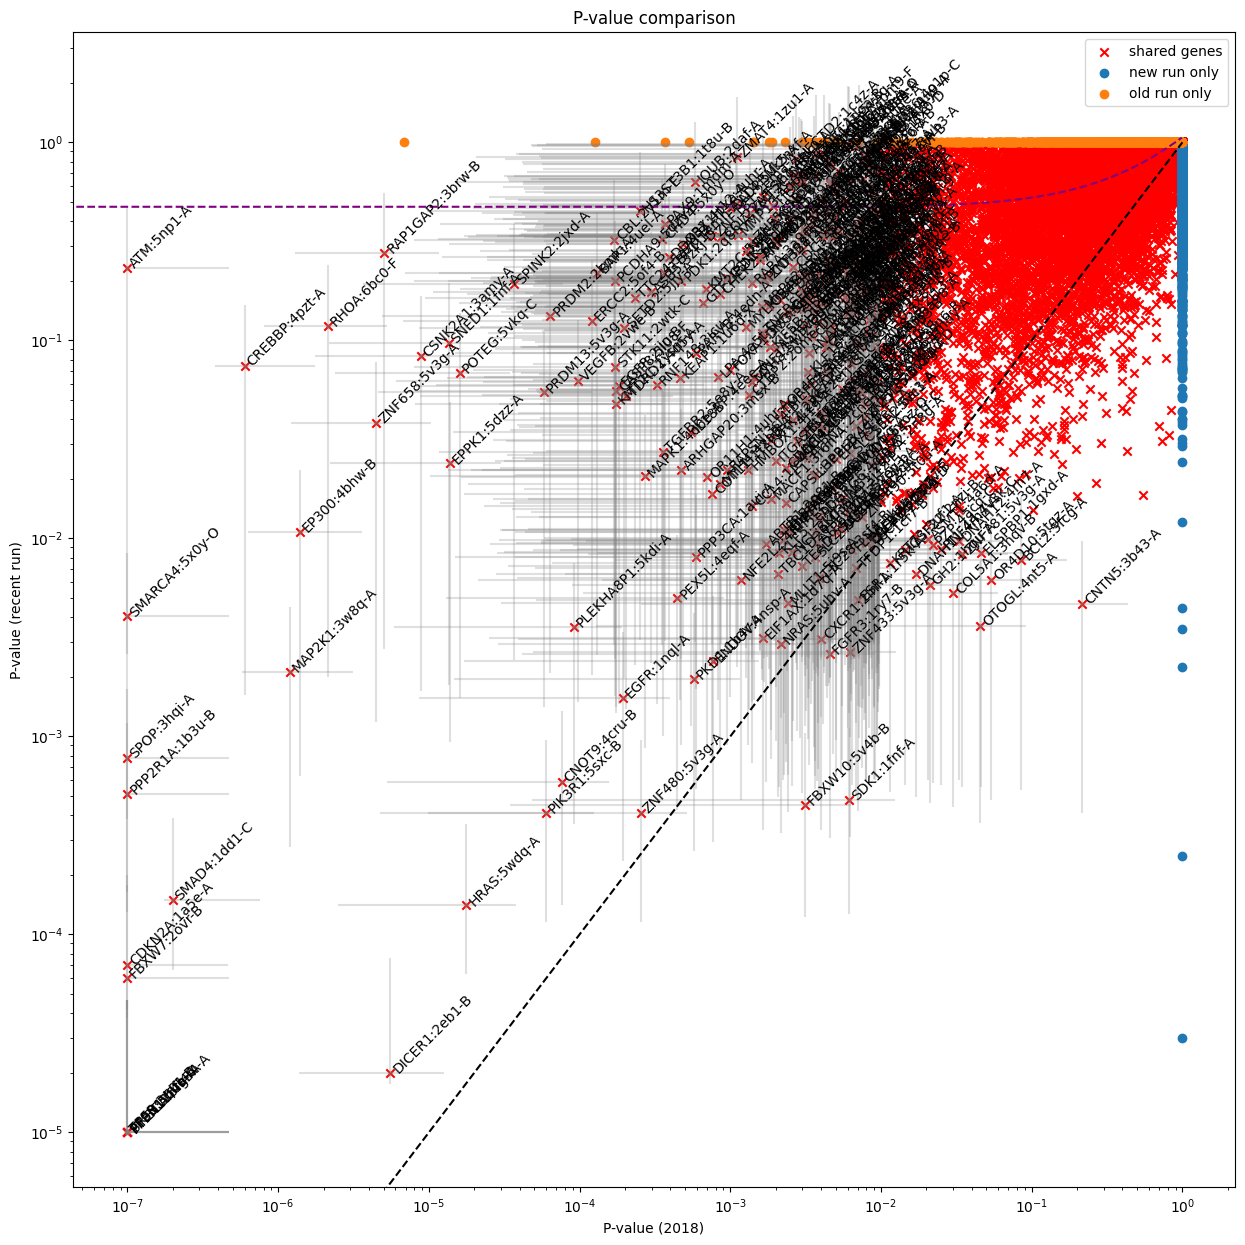

In [8]:
from scipy.stats import beta, betabinom, linregress





oldperm = 10000000
newperm = 100000




old_results.loc[old_results['CLUMPS_P'] == 0, 'CLUMPS_P'] = 1/oldperm
new_results.loc[new_results['CLUMPS_P'] == 0, 'CLUMPS_P'] = 1/newperm

results = pd.DataFrame(index=old_results.index)
results['oldps'] = old_results['CLUMPS_P']
results['newps'] = new_results['CLUMPS_P']

results = results.loc[(results['oldps'] < 0.01) | (results['newps'] < 0.01)]
results['gene'] = results.index.str.replace(':[0-9]*:[0-9]*','')


olda = results['oldps']*oldperm
oldb = oldperm - results['oldps']*oldperm

old95ci = beta.interval(0.95,olda,oldb)

newa = results['newps']*newperm
newb = newperm - results['newps']*newperm

new95ci = beta.interval(0.95,newa,newb)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,15)

lin = linregress(old_results['CLUMPS_P'],new_results['CLUMPS_P'])
print(lin.rvalue)
print(lin.pvalue)

xl = np.arange(0,1,0.01)
yl = xl*lin.slope + lin.intercept



ax.errorbar(results['oldps'],results['newps'],xerr=old95ci,yerr=new95ci,marker='.',linestyle='',alpha=0.25,color='grey')
ax.scatter(old_results['CLUMPS_P'],new_results['CLUMPS_P'],marker='x',color='red')
#ax.scatter(results['oldps'],results['newps'],marker='x',color='red')

ax.scatter(np.ones(len(new_only['CLUMPS_P'])),new_only['CLUMPS_P'])
ax.scatter(old_only['CLUMPS_P'],np.ones(len(old_only['CLUMPS_P'])))


oldtmp = old_only.loc[old_only['CLUMPS_P']<0.00001]

    

ax.plot([0, 1],[0, 1],linestyle='--',color='black')
ax.plot(xl,yl,linestyle='--',color='purple')
ax.set_title('P-value comparison')
ax.set_xlabel('P-value (2018)')
ax.set_ylabel('P-value (recent run)')
plt.yscale("log")
plt.xscale("log")
plt.legend(['shared genes','new run only','old run only'])
for i in range(0,len(results.index)):
    ax.text(results.iloc[i]['oldps'],results.iloc[i]['newps'],results.iloc[i]['gene'],rotation=45,size=10)
#for i in range(0,len(oldtmp.index)):
#    ax.text(oldtmp.iloc[i]['CLUMPS_P'],1,oldtmp.iloc[i]['GENE_NAMES'],size=8)

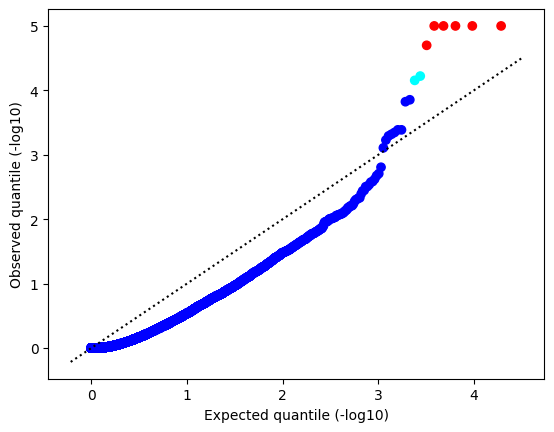

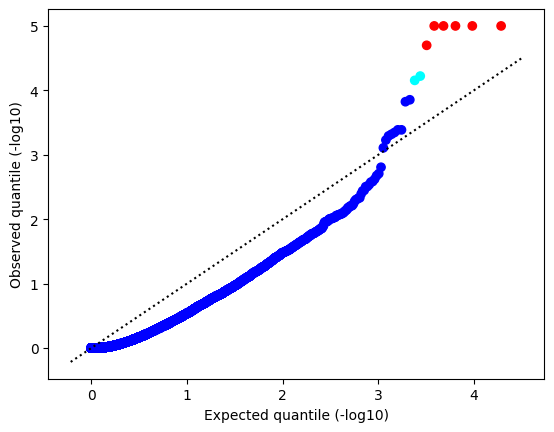

In [9]:
from capy import plots

plots.QQ(new_results['CLUMPS_P'])

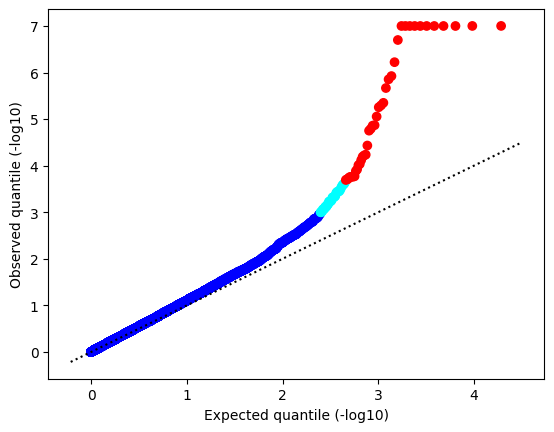

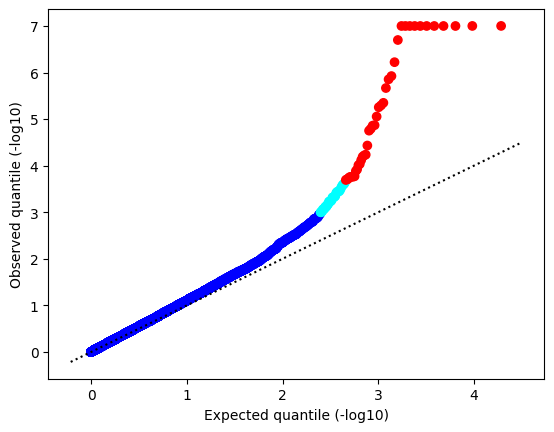

In [10]:
plots.QQ(old_results['CLUMPS_P'])

In [11]:
results

,oldps,newps,gene
ATM:5np1-A:3:3056,1.000000e-07,0.232250,ATM:5np1-A
PIK3CA:5fi4-A:2:1062,1.000000e-07,0.000010,PIK3CA:5fi4-A
PPP2R1A:1b3u-B:2:589,1.000000e-07,0.000510,PPP2R1A:1b3u-B
PTEN:5bug-A:14:351,1.000000e-07,0.000010,PTEN:5bug-A
PTPN11:4h34-A:4:541,1.000000e-07,0.000010,PTPN11:4h34-A
...,...,...,...
ELSPBP1:1gxd-A:17:223,4.600000e-02,0.008403,ELSPBP1:1gxd-A
OTOGL:4nt5-A:2244:2329,4.550000e-02,0.003630,OTOGL:4nt5-A
OR4D10:5tgz-A:4:301,5.400000e-02,0.006190,OR4D10:5tgz-A
BCL2:5fcg-A:6:203,8.500000e-02,0.007816,BCL2:5fcg-A


In [12]:
from scipy.stats import linregress


results = linregress(results['oldps'],results['newps'])
print(results.rvalue)
print(results.pvalue)

-0.061508713490012516
0.2652033899632341


In [13]:
np.arange(0,1,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

Text(0, 0.5, 'NSITES (recent run)')

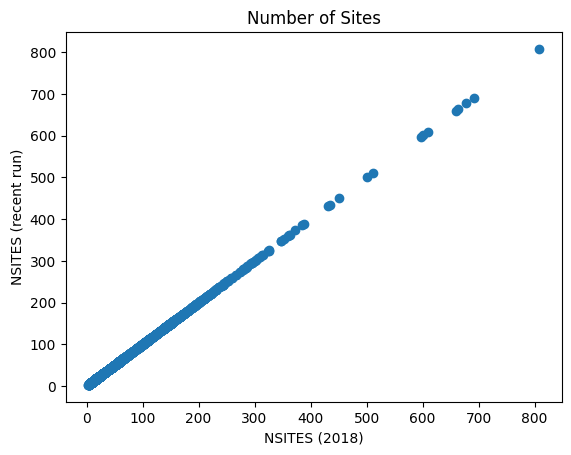

In [14]:
fig, ax = plt.subplots(1,1)

ax.scatter(old_results['NSITES'],new_results['NSITES'])
ax.set_title('Number of Sites')
ax.set_xlabel('NSITES (2018)')
ax.set_ylabel('NSITES (recent run)')

Text(0, 0.5, 'NSAMPS (recent run)')

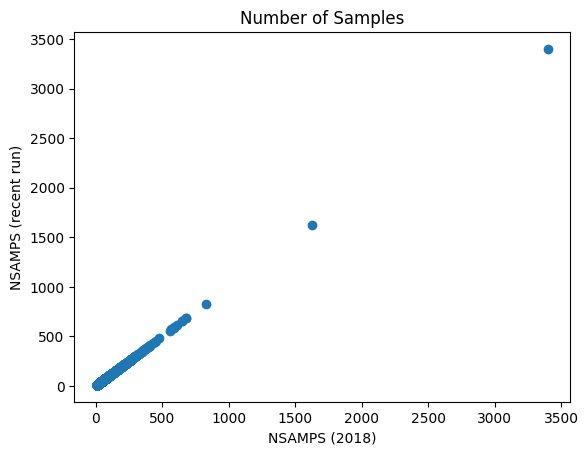

In [15]:
fig, ax = plt.subplots(1,1)


ax.scatter(old_results['NSAMPLES'],new_results['NSAMPLES'])

ax.set_title('Number of Samples')
ax.set_xlabel('NSAMPS (2018)')
ax.set_ylabel('NSAMPS (recent run)')

In [16]:
new_results.loc[old_results['NSAMPLES'] != new_results['NSAMPLES']]

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
IGHM:2agj-H:1:106,6710,IGHM,0.662625,1.0,39,34,5+6+7+19+20+21+22+25+36+37+41+44+47+51+52+53+5...,P01871,P01871,2agj-H,100.0,NaN,474.0,1,106,NaN,-1.0
IGKV2-30:3cfk-E:21:120,1393,IGKV2-30,0.203125,1.0,28,21,52+65+66+69+71+74+78+80+84+85+86+90+91+93+94+1...,P06310,Q8TCD0,3cfk-E,97.0,NaN,120.0,21,120,NaN,-1.0
KCNJ18:3spg-A:42:372,7921,KCNJ18,0.730500,1.0,171,117,45+46+49+53+58+60+61+62+64+66+73+75+77+79+80+8...,B7U540,F1NHE9,3spg-A,89.8,NaN,433.0,42,372,NaN,-1.0


In [17]:
old_results.loc[old_results['NSAMPLES'] != new_results['NSAMPLES']]

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
IGHM:2agj-H:1:106,IGHM,P01871,NaN,P01871,2agj-H,NaN,453.0,1,106,100.0,35,42,0.343,0.903267,-1.0,NaN
IGKV2-30:3cfk-E:21:120,IGKV2-30,P06310,NaN,Q8TCD0,3cfk-E,NaN,120.0,21,120,97.0,22,30,0.367,0.907870,-1.0,NaN
KCNJ18:3spg-A:42:372,KCNJ18,B7U540,NaN,F1NHE9,3spg-A,NaN,433.0,42,372,89.8,119,174,0.392,0.913857,-1.0,NaN


In [18]:
old_results.loc[old_results['NSITES'] != new_results['NSITES']]

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
IGHM:2agj-H:1:106,IGHM,P01871,NaN,P01871,2agj-H,NaN,453.0,1,106,100.0,35,42,0.343,0.903267,-1.0,NaN
IGKV2-30:3cfk-E:21:120,IGKV2-30,P06310,NaN,Q8TCD0,3cfk-E,NaN,120.0,21,120,97.0,22,30,0.367,0.907870,-1.0,NaN
KCNJ18:3spg-A:42:372,KCNJ18,B7U540,NaN,F1NHE9,3spg-A,NaN,433.0,42,372,89.8,119,174,0.392,0.913857,-1.0,NaN
CTRB1:2cga-B:19:263,CTRB1,P17538,NaN,P00766,2cga-B,NaN,263.0,19,263,81.6,12,13,0.451,0.926575,-1.0,NaN


In [19]:
new_results.loc[new_results['GENE_NAMES']=='ATM']

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
ATM:5np1-A:3:3056,1645,ATM,0.23225,1.0,403,388,12+13+22+23+24+45+59+93+100+104+107+120+158+16...,Q13315,Q13315,5np1-A,100.0,NaN,3056.0,3,3056,ATM,1.0


In [20]:
new_results.loc[(new_results['CLUMPS_P']>0.01) & (old_results['CLUMPS_P']<0.0001)].to_csv('outlier_genes.txt',sep='\t')

In [21]:
new_results.loc[(new_results['CLUMPS_P']>0.01) & (old_results['CLUMPS_P']<0.0001)].to_csv('outlier_genes.txt',sep='\t')